Evaluation Project - 10
Zomato Restaurant Project
Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets
Downlaod Files:
https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


In [135]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV


In [54]:
df1=pd.read_csv('zomato.csv')


In [46]:
df1.sample(5)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
314,16604358,Blue Bean Love Cafe,14,Hepburn Springs,"115 Main Rd, Hepburn Springs, Hepburn Springs,...",Hepburn Springs,"Hepburn Springs, Hepburn Springs",144.138701,-37.312327,"Cafe, Coffee and Tea, Modern Australian",...,Dollar($),No,No,No,No,2,3.8,Yellow,Good,192
9441,6400421,Truth Coffee,189,Cape Town,"36 Buitenkant Street, CBD, Cape Town",CBD,"CBD, Cape Town",18.422860,-33.928496,Cafe,...,Rand(R),No,No,No,No,2,4.4,Green,Very Good,514
3558,18423116,Hardwari,1,New Delhi,"18/47, Main Market, East Patel Nagar, New Delhi",East Patel Nagar,"East Patel Nagar, New Delhi",77.173412,28.646095,Mithai,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,3
6622,312959,Babu Jhatka,1,New Delhi,"Shop 19, DDA Market, Rajouri Garden, New Delhi",Rajouri Garden,"Rajouri Garden, New Delhi",77.115356,28.639458,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,5
9339,6900374,Bank,215,Birmingham,"4 Brindleyplace, Brindleyplace, Birmingham B1 2JB","Brindleyplace, Broad Street","Brindleyplace, Broad Street, Birmingham",-1.914805,52.477693,"British, Steak",...,Pounds(��),Yes,No,No,No,3,4.0,Green,Very Good,133


In [68]:
df2=pd.read_csv('D:\Country-Code.csv')


In [69]:
df2.sample(1)

,Country Code,Country
11,208,Turkey


In [75]:
#Combining both the dataframes
df=pd.merge(df1,df2,on='Country Code')


In [76]:
df.shape

(9551, 22)

In [77]:
df.sample(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
6591,8666,Singh's Kitchen,1,New Delhi,"4-D/13, Old Rajinder Nagar, Rajinder Nagar, Ne...",Rajinder Nagar,"Rajinder Nagar, New Delhi",77.182287,28.639273,"Chinese, Fast Food",...,No,Yes,No,No,1,2.7,Orange,Average,84,India


Hence the column country is added to df1 and df is the new dataset created with 22 columns and 9551 rows



In [78]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Above are the 22 variables of the dataset, We need to be predicting 2 cases i.e, Average cost for two and Price range.



In [79]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [80]:
Obj_columns=df.select_dtypes(include=[object])
Obj_columns


,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good,Phillipines
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent,Phillipines
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9547,Ceviz A��ac۱,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul","World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey
9548,Huqqa,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul","Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good,Turkey
9549,A���k Kahve,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good,Turkey


There are 14 variables in the dataset which has object data type



In [81]:
float_columns=df.select_dtypes(include=[float])
float_columns


,Longitude,Latitude,Aggregate rating
0,121.027535,14.565443,4.8
1,121.014101,14.553708,4.5
2,121.056831,14.581404,4.4
3,121.056475,14.585318,4.9
4,121.057508,14.584450,4.8
...,...,...,...
9546,28.977392,41.022793,4.1
9547,29.041297,41.009847,4.2
9548,29.034640,41.055817,3.7
9549,29.036019,41.057979,4.0


3 variables have float data type



In [82]:
int_columns=df.select_dtypes(include=[int])
int_columns


,Restaurant ID,Country Code,Average Cost for two,Price range,Votes
0,6317637,162,1100,3,314
1,6304287,162,1200,3,591
2,6300002,162,4000,4,270
3,6318506,162,1500,4,365
4,6314302,162,1500,4,229
...,...,...,...,...,...
9546,5915730,208,80,3,788
9547,5908749,208,105,3,1034
9548,5915807,208,170,4,661
9549,5916112,208,120,4,901


2 variables have integer data type



In [83]:
Obj_columns.columns


Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

As we can observe in Object type variables, it includes certain things like address of the restaurant, name, Locality Verbose which does'nt make any impact on target variables, to make the further EDA simple it is good drop these variables from the dataset



In [84]:
df.drop(['Restaurant Name','Address','Locality Verbose'],axis=1,inplace=True)


<AxesSubplot:xlabel='Average Cost for two'>

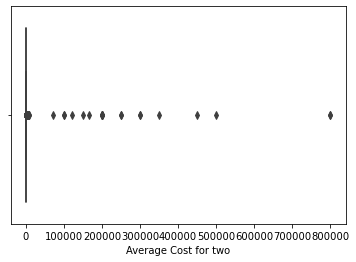

In [85]:
sns.boxplot(df['Average Cost for two'])


The data in Average cost for two variable is too spreaded as we can observe in the plot above, the minimum range is 0 and lasts to 800000



<AxesSubplot:xlabel='Price range', ylabel='count'>

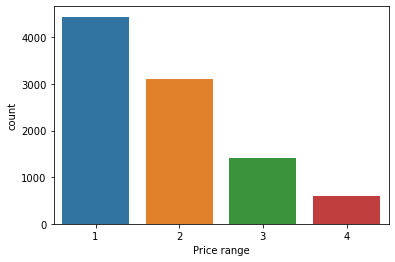

In [86]:
sns.countplot(df['Price range'])


The variable Price range is categorical and has 4 categories 1, 2, 3 and 4. FRom the above plot we can observe that most of the restaurants fall under category 1 range



In [87]:
df['City'].value_counts()


New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64

From the above details we can observe that there are 141 different cities in the dataset



<AxesSubplot:xlabel='Country', ylabel='count'>

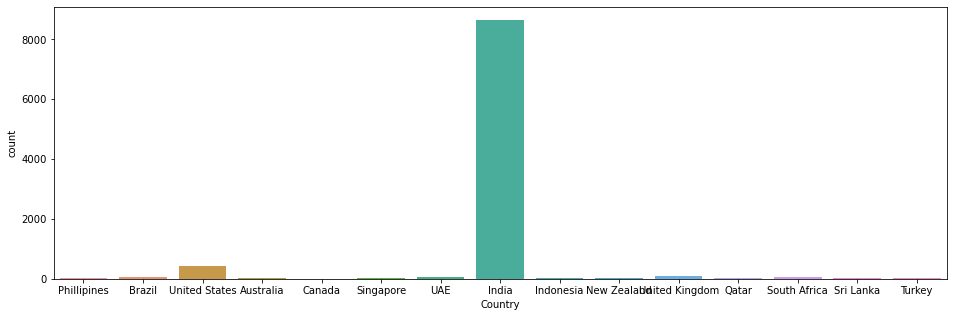

In [88]:
plt.figure(figsize=(16,5))
sns.countplot(df['Country'])


In [89]:
df['Country'].value_counts()


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Above details tells that majority of the restaurants in the dataset are from India(8652) and there are only 4 restaurants included from canada, As the Country code and Country tells us about same details it is good to drop the variable country and hold back Country code as it is in the integer type



In [91]:
df['Cuisines'].value_counts()


North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In the Cuisines variable we can see that there are 1825 different categories, As the price of the restaurant depends on cuisines we can hold this column back and check for its impact on target variables



In [93]:
df['Currency'].unique()


array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

The variable Currency tells us about the currency being used in each restaurant and it has 12 unique values in this variable.



<AxesSubplot:xlabel='Has Online delivery', ylabel='Count'>

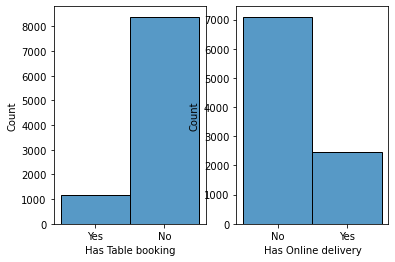

In [94]:
plt.subplot(1,2,1)
sns.histplot(df['Has Table booking'])
plt.subplot(1,2,2)
sns.histplot(df['Has Online delivery'])


From the above plots we can understand that most of the restaurants has no table bookings and has no online delivery



<AxesSubplot:xlabel='Switch to order menu', ylabel='count'>

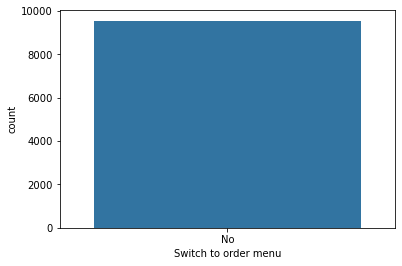

In [95]:
sns.countplot(df['Switch to order menu'])


From the above plot we can understand that none of the columns are switching to order menu



<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

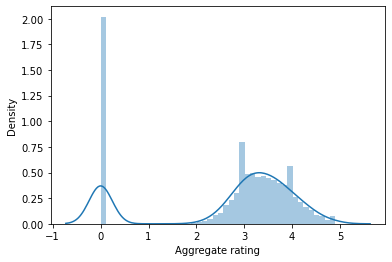

In [96]:
sns.distplot(df['Aggregate rating'])


For most of the restaurants we can observe from the above plot that it is ranging from 2 to 5



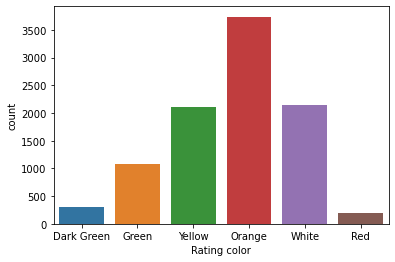

In [97]:
plt1=sns.countplot(df['Rating color'])


The above plot shows the details about the colors used for ratings purpose, most of the restaurants are rating with orange color



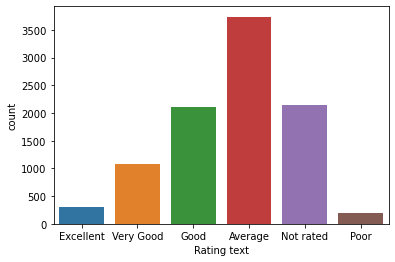

In [98]:
plt2=sns.countplot(df['Rating text'])


Above plot is about what rating is been given to the restaurants by the customers, we can observe that most of the restaurants are rated as Average and very less restaurants fall under Poor and Excellents category.



<AxesSubplot:xlabel='Has Table booking', ylabel='Price range'>

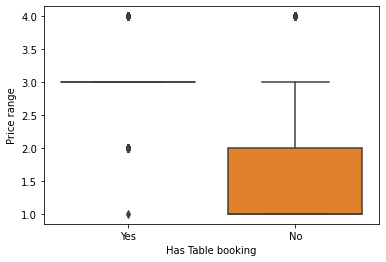

In [99]:
sns.boxplot(y='Price range', x='Has Table booking', data=df)


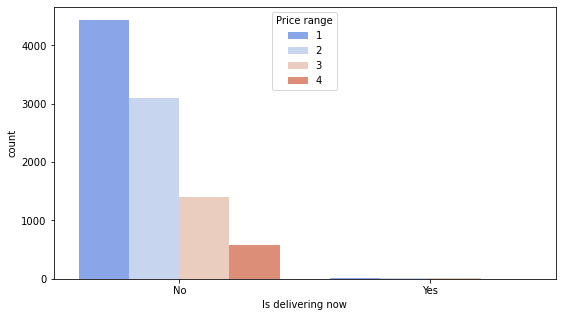

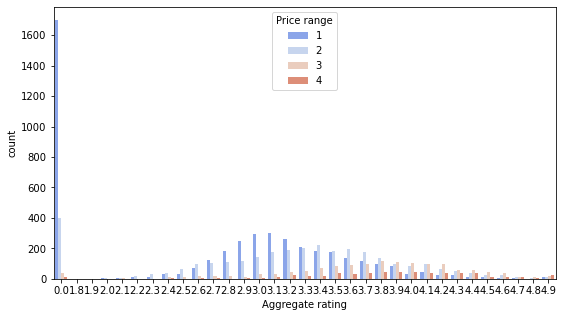

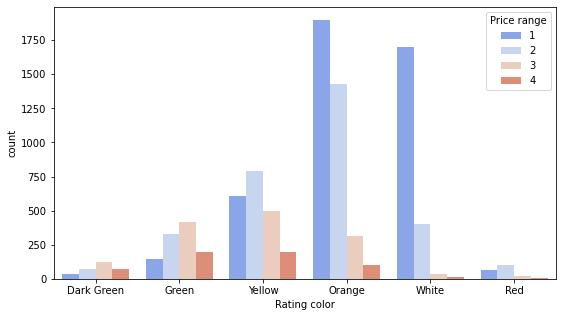

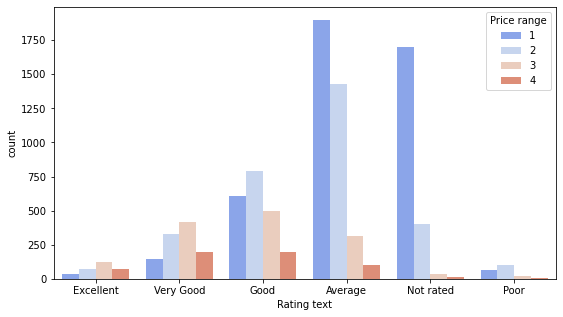

In [100]:
Cat_cols=['Is delivering now','Aggregate rating','Rating color','Rating text']
for cols in Cat_cols:
    plt.figure(figsize=(9,5))
    sns.countplot(x=cols,hue='Price range',data=df,palette='coolwarm')
    plt.show()


The above plots give us detailed description about the relationship of the variable Price range and othe categorical variables like Is delivering now, Aggregate rating, Rating color and rating text



<AxesSubplot:xlabel='Average Cost for two', ylabel='Rating text'>

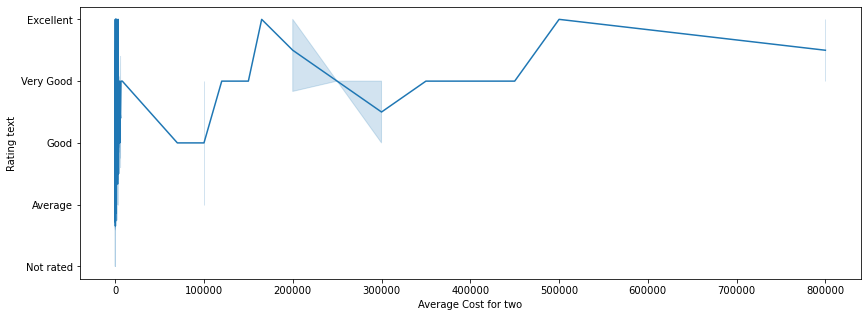

In [101]:
plt.figure(figsize = (14,5))
sns.lineplot(y='Rating text', x='Average Cost for two', data=df)


From the above plot we can observe that for the restaurants which has rating text as Very Good and Excellent, the Average Cost for two is higher.



<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

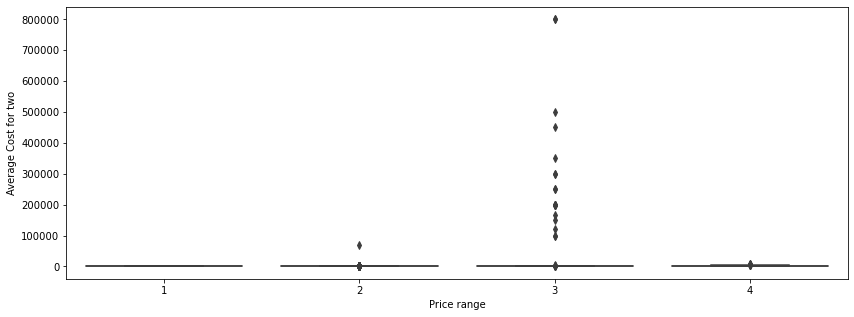

In [102]:
plt.figure(figsize = (14,5))
sns.boxplot(x='Price range', y='Average Cost for two', data=df)


The price range which has the category 3 has the wide range of average cost for two



In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Longitude             9551 non-null   float64
 5   Latitude              9551 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9551 non-null   int64  
 8   Currency              9551 non-null   object 
 9   Has Table booking     9551 non-null   object 
 10  Has Online delivery   9551 non-null   object 
 11  Is delivering now     9551 non-null   object 
 12  Switch to order menu  9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

In [104]:
df.isnull().sum()


Restaurant ID           0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

there is no any missing values in the dataset

In [105]:

df.drop(['Country','Locality','Restaurant ID'],axis=1,inplace=True)
df.shape


(9551, 16)

As the country and country code are gives us same details we can drop that column before encoding

The variable locality is also giving us similar details like city, we can drop locality as well

Restaurant Id has no any impact on the output variables, hence we can drop that variable as well

In [106]:
Encode=df.select_dtypes(include=[object])
Encode

,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Makati City,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Makati City,Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Mandaluyong City,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Mandaluyong City,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...
9546,��stanbul,Turkish,Turkish Lira(TL),No,No,No,No,Green,Very Good
9547,��stanbul,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,Green,Very Good
9548,��stanbul,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,Yellow,Good
9549,��stanbul,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,Green,Very Good


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [108]:
for columns in Encode:
    df[columns] = le.fit_transform(df[columns])


In [109]:
df.dtypes


Country Code              int64
City                      int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

Here all the columns in the dataset are in float and integer data types



In [110]:
df.describe()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,78.301434,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,156.909748
std,56.750546,23.198915,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,430.169145
min,1.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,76.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,1.000000,88.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.000000,88.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,131.000000
max,216.000000,140.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


Key Observations :

Mean > median (50th percentile) Country Code, City, Average Cost for two and votes variables we can find these data to be left skewed

We can observe that there is a huge gap between 75th percentile and max in the variables Country code, City, Longitude, Latitude, Cuisines, Average Cost for two, Currency and Votes we can expect these variables to have outliers

We can see that there is a high gap between mean and std in case of Country code, City, Longitude, Latitude, Cuisines, Average Cost for two and Votes and assume that the data is highly spreaded in these cases


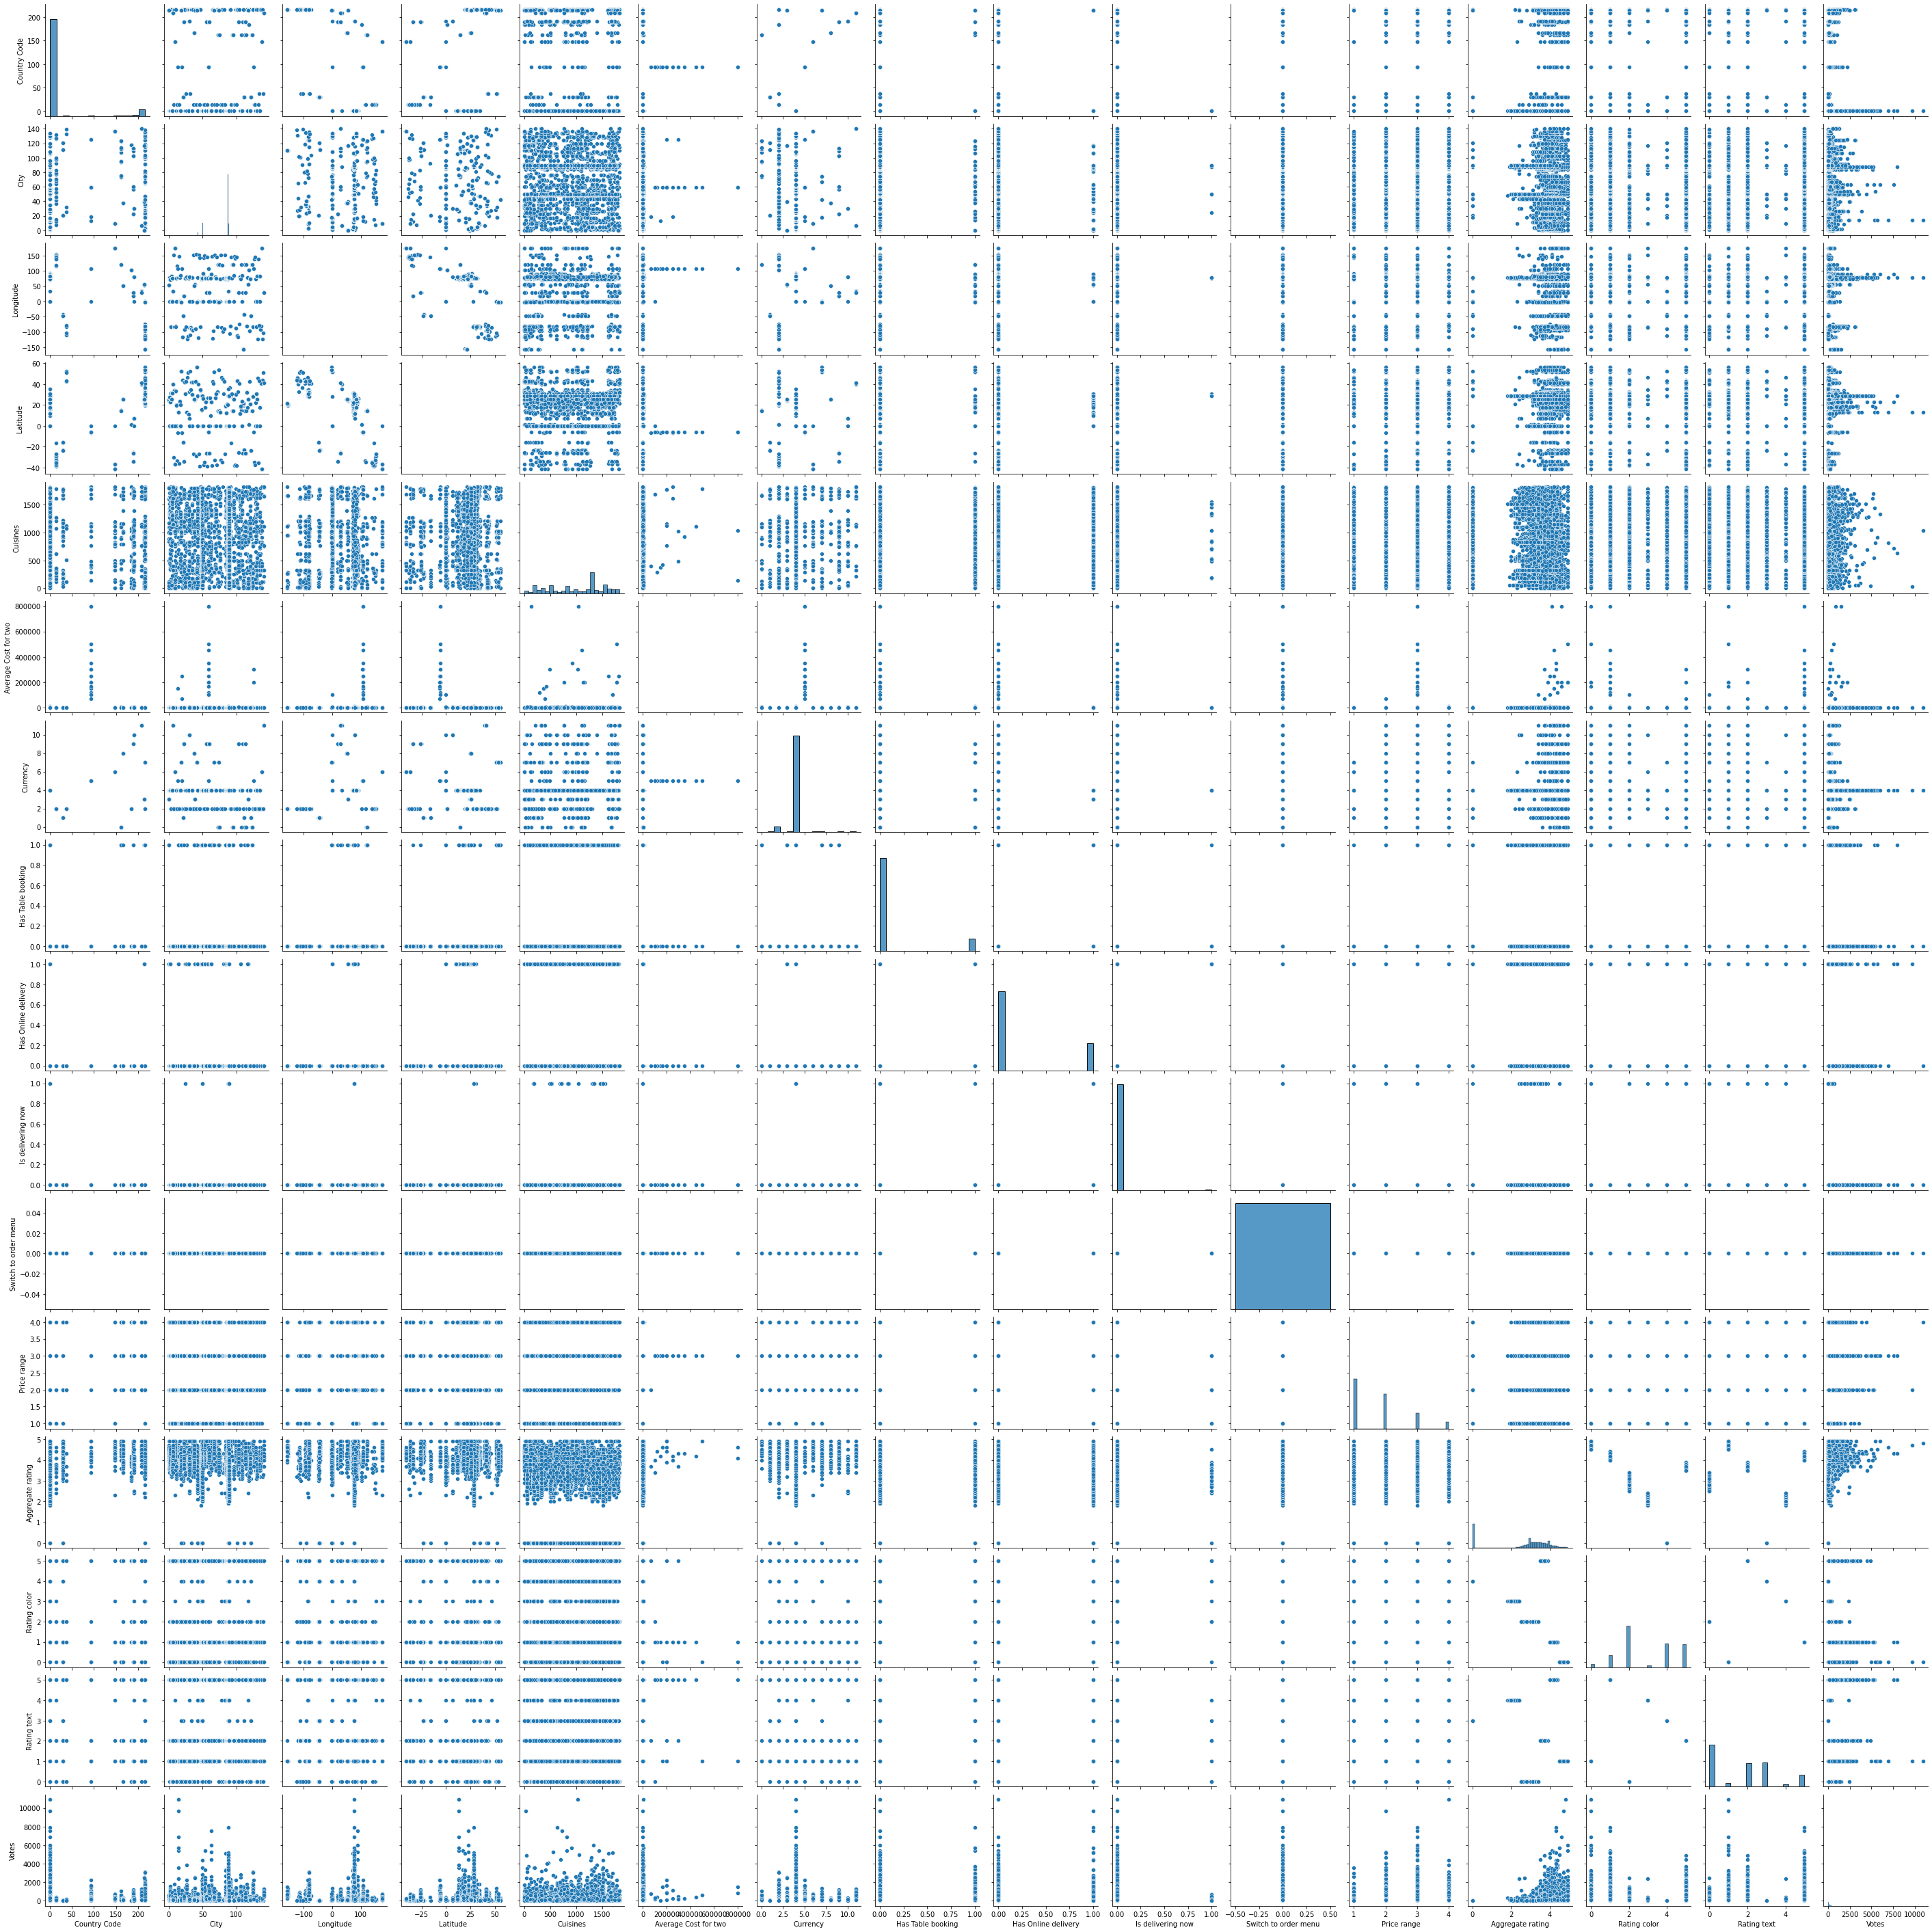

In [111]:
sns.pairplot(df)


In [112]:
df.corr()


,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,-0.181728,-0.698299,0.019792,-0.129451,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530
City,-0.181728,1.000000,0.117391,-0.004301,0.025764,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Longitude,-0.698299,0.117391,1.000000,0.043207,0.122457,0.045891,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.019792,-0.004301,0.043207,1.000000,0.038646,-0.111088,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,-0.129451,0.025764,0.122457,0.038646,1.000000,0.005755,0.066783,0.050232,-0.017180,0.007708,NaN,-0.005489,-0.079494,-0.016180,-0.080025,-0.032362
Average Cost for two,0.043225,-0.028838,0.045891,-0.111088,0.005755,1.000000,0.045615,0.007758,-0.018974,-0.001862,NaN,0.075083,0.051792,-0.049970,0.031439,0.067783
Currency,-0.033466,-0.071996,0.337334,-0.101864,0.066783,0.045615,1.000000,0.000640,0.006991,0.001458,NaN,0.075179,-0.006939,-0.040430,0.014598,-0.027111
Has Table booking,-0.061682,-0.003762,0.100488,0.054658,0.050232,0.007758,0.000640,1.000000,0.101224,-0.016816,NaN,0.501925,0.189998,-0.021365,0.044043,0.169422
Has Online delivery,-0.154605,0.012723,0.178757,0.118722,-0.017180,-0.018974,0.006991,0.101224,1.000000,0.101730,NaN,0.077918,0.225699,0.011477,-0.080937,0.074303
Is delivering now,-0.018291,-0.014039,0.018787,0.015001,0.007708,-0.001862,0.001458,-0.016816,0.101730,1.000000,NaN,0.010940,0.019180,0.001886,-0.031970,-0.001124


<AxesSubplot:>

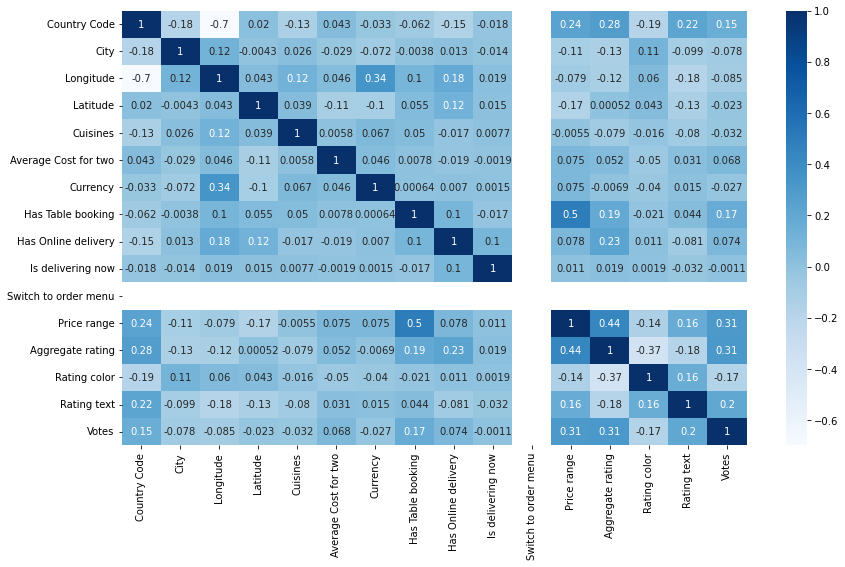

In [113]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


Key Observation :

The output variable Price range has better correlation with the variables Votes, Aggregate rating, Has Table booking and Country code

Price range has negative correlation with Rating color, city, Longitude, Latitude and Cuisines

Average cost for two has positive correlation with Votes, Ratings, Price range, Table booking, Currency, Longitude and country code


Country Code               AxesSubplot(0.125,0.772143;0.227941x0.107857)
City                    AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Longitude               AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Latitude                   AxesSubplot(0.125,0.642714;0.227941x0.107857)
Cuisines                AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Average Cost for two    AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Currency                   AxesSubplot(0.125,0.513286;0.227941x0.107857)
Has Table booking       AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Has Online delivery     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Is delivering now          AxesSubplot(0.125,0.383857;0.227941x0.107857)
Switch to order menu    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Price range             AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Aggregate rating           AxesSubplot(0.125,0.254429;0.227941x0.107857)
Rating color            AxesSubplot(0.398529,0.2544

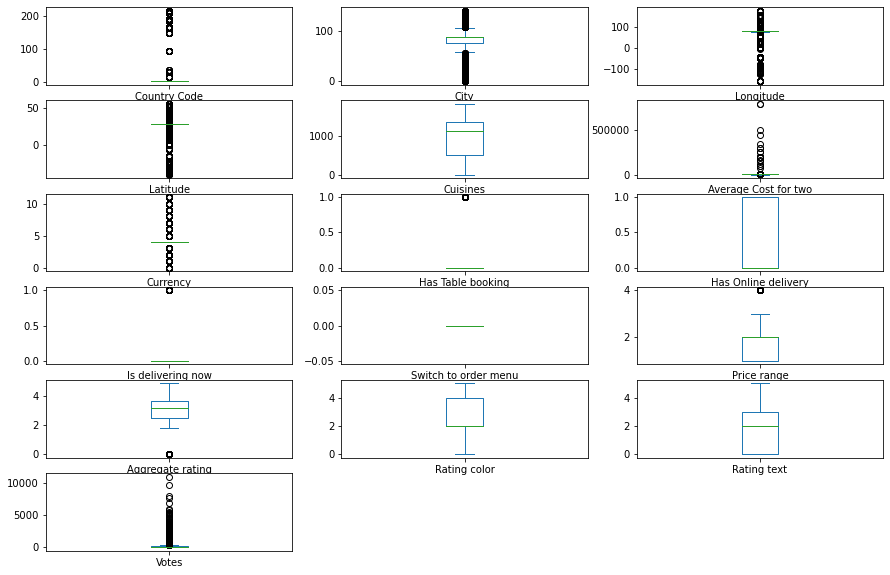

In [114]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))


We can see that there are outliers in the variables Votes, Currency, Average Cost for two, Latitude, Longitude, City and Country Code



In [115]:
Outliers=['Votes', 'Currency', 'Average Cost for two', 'Latitude', 'Longitude', 'City', 'Country Code']
for col in Outliers:
    from scipy.stats import zscore
    z=np.abs(zscore(df[col]))


In [116]:
Threshold=3
print(np.where(z>3))


(array([  82,   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,
         93,   94,   95,   96,   97,   98,   99,  100,  101,  102,  103,
        104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,
        115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,
        137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  149,  150,  151,  152,  153,  154,  155,  156,  157,  158,
        159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
        170,  171,  172,  173,  174,  175,  176,  177,  178,  179,  180,
        181,  182,  183,  184,  185,  186,  187,  188,  189,  190,  191,
        192,  193,  194,  195,  196,  197,  198,  199,  200,  201,  202,
        203,  204,  205,  206,  207,  208,  209,  210,  211,  212,  213,
        214,  215,  216,  217,  218,  219,  220,  221,  222,  223,  224,
        225,  226,  227,  228,  229,  230,  231,  

In [117]:
df_new=df[(z<3)]
df_new


,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,73,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,162,73,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,162,75,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,162,75,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,162,75,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,166,38,51.526653,25.323261,794,200,8,0,0,0,0,4,3.9,5,2,197
9433,166,38,51.530127,25.350325,1022,550,8,0,0,0,0,4,4.4,1,5,67
9434,166,38,51.512909,25.276180,1795,445,8,0,0,0,0,4,4.3,1,5,73
9435,166,38,51.544576,25.273020,1031,400,8,0,0,0,0,4,4.5,0,1,145


In [118]:
df.shape


(9551, 16)

The original data set without removing outliers has 9551 rows and 16 columns



In [119]:
df_new.shape


(8863, 16)

The new dataset after removing outliers has 8863 rows and 16 columns



In [120]:
# Now we can check for data loss

Dataloss = (((9551-8863)/9551)*100)
Dataloss


7.203434195372211

We can observe that dataloss in zscore method after removing outliers of 7.2% which is less than 10%



In [121]:
df_new.skew()


Country Code             8.448058
City                    -1.435690
Longitude               -2.590517
Latitude                -3.767998
Cuisines                -0.338624
Average Cost for two    34.181938
Currency                -2.535279
Has Table booking        2.240192
Has Online delivery      1.017081
Is delivering now       16.055142
Switch to order menu     0.000000
Price range              0.967029
Aggregate rating        -0.894038
Rating color             0.069558
Rating text              0.437439
Votes                    9.597942
dtype: float64

In [122]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[['Country Code', 'City', 'Longitude', 'Latitude', 'Currency', 'Votes']]=scaler.fit_transform(df_new[['Country Code', 'City', 'Longitude', 'Latitude', 'Currency', 'Votes']].values)


In [123]:
df_new.skew()


Country Code             6.248387
City                    -0.074781
Longitude                0.445469
Latitude                -1.921905
Cuisines                -0.338624
Average Cost for two    34.181938
Currency                 2.888450
Has Table booking        2.240192
Has Online delivery      1.017081
Is delivering now       16.055142
Switch to order menu     0.000000
Price range              0.967029
Aggregate rating        -0.894038
Rating color             0.069558
Rating text              0.437439
Votes                    0.006861
dtype: float64

Hence the skewness is removed from the data



Predicting Average cost for two

We can now check for multicolinearity



In [124]:
x=df_new.drop(['Average Cost for two'],axis=1)
x.sample()


,Country Code,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1044,-0.156165,-1.784161,0.148105,0.325595,1514,0.020311,0,0,0,0,1,0.0,4,3,-1.603647


In [125]:
y=df_new['Average Cost for two']
y


0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9432     200
9433     550
9434     445
9435     400
9436     160
Name: Average Cost for two, Length: 8863, dtype: int64

In [126]:
y.shape,x.shape


((8863,), (8863, 15))

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [128]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [129]:
vif_calc()


    VIF Factor              Features
0     1.684828          Country Code
1     1.035133                  City
2     1.737585             Longitude
3     1.877859              Latitude
4     4.369894              Cuisines
5     1.093089              Currency
6     1.724326     Has Table booking
7     1.631596   Has Online delivery
8     1.017153     Is delivering now
9          NaN  Switch to order menu
10    8.851546           Price range
11    7.822165      Aggregate rating
12    5.080800          Rating color
13    2.548074           Rating text
14    2.493824                 Votes


There is no multicollinearity present in the data



In [130]:
# Splitting the data for training and testing the model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [131]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((6647, 15), (2216, 15), (6647,), (2216,))

In [136]:
from sklearn.linear_model import Ridge, Lasso
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()


In [137]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Score of ",m,"is :",m.score(x_train,y_train))
    print("r2 score :",r2_score(y_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y_test,pred))
    print("Mean squared error :",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    print('**************************************************')

Score of  LinearRegression() is : 0.08919020239314968
r2 score : 0.08892534397520302
Errors of  LinearRegression() is
Mean absolute error : 2351.3186998279443
Mean squared error : 436312624.4175702
Root mean squared error : 20888.097673497465


**************************************************
Score of  DecisionTreeRegressor() is : 0.9999997719741688
r2 score : 0.46608329944945326
Errors of  DecisionTreeRegressor() is
Mean absolute error : 719.8567238267148
Mean squared error : 255692105.2485501
Root mean squared error : 15990.37539423481


**************************************************
Score of  KNeighborsRegressor() is : 0.32479060155166906
r2 score : 0.08000531800104316
Errors of  KNeighborsRegressor() is
Mean absolute error : 1208.3693140794223
Mean squared error : 440584414.7883393
Root mean squared error : 20990.10278174786


**************************************************
Score of  SVR() is : -0.0023811246805141018
r2 score : -0.0025281068199711765
Errors of  SVR() is
Me

From the above models we can observe that DecissionTreeClassifier model is giving accuracy score 99% and r2 score of 72% and we can consider that to be the best model for now



In [138]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x_train,y_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')
    print('******************************************')

score of  LinearRegression() is : [ 0.0611394  -0.10020607 -0.75028764  0.03227135  0.01957101]
score mean of  LinearRegression() is : -0.14750239042097232
score std of  LinearRegression() is : 0.3063822827688851


******************************************
score of  DecisionTreeRegressor() is : [ 0.50842346  0.02646876 -2.11844968 -1.08130719  0.21424233]
score mean of  DecisionTreeRegressor() is : -0.4901244636781435
score std of  DecisionTreeRegressor() is : 0.9758113642952206


******************************************
score of  KNeighborsRegressor() is : [-0.00519649  0.10821403 -0.65014245 -0.12363246 -0.16367524]
score mean of  KNeighborsRegressor() is : -0.16688652066306975
score std of  KNeighborsRegressor() is : 0.2597081035998845


******************************************
score of  SVR() is : [-0.00394056 -0.00348329 -0.00406788 -0.00328976 -0.00346582]
score mean of  SVR() is : -0.0036494634495325418
score std of  SVR() is : 0.0003001795183733766


**********************

Even with CV we can observe that DecisionTreeClassifier gives us better score mean of 62.2%



In [139]:
# Parameter tuning for DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
DTR=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [140]:
grd.best_params_


{'criterion': 'squared_error'}

In [141]:
grd.best_score_


-0.5621084070673772

In [142]:
# Parameter tuning for Ridge()

param_alpha={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
gd=GridSearchCV(estimator=rd,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [143]:
gd.best_score_


-0.14748940814628392

In [144]:
gd.best_params_


{'alpha': 0.1}

In [145]:
# Parameter tuning for Lasso()

param_alpha={'alpha':[0.0001,0.001,0.01,0.1,1,10]}
ls=Lasso()
gd=GridSearchCV(estimator=ls,param_grid=param_alpha,cv=5)
gd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [146]:
gd.best_score_


-0.1439440964995211

In [147]:
gd.best_params_


{'alpha': 10}

From the above 3 models after doing parameter tuning we can observe that Decision TreeClassifier is giving the best score of 67.7% with criterion as absolute_error

saving the model

In [149]:
Final_regressor=DecisionTreeRegressor(criterion='absolute_error')
Final_regressor.fit(x_train,y_train)
pred=Final_regressor.predict(x_test)
print("Score: ",Final_regressor.score(x_train,y_train)*100)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test,pred)))


Score:  99.99997372012471
R2_Score: 39.269054389504454
mean_squared_error: 290839813.0433213
mean_absolute_error: 822.3592057761733
RMSE value: 17054.02630006537


In [150]:
# We can save the model now
import joblib
joblib.dump(Final_regressor,'Average_Cost_for_two_prediction.obj')


['Average_Cost_for_two_prediction.obj']

In [151]:
# Loading the saved model and predicting the values

Average_Cost_Prediction=joblib.load('Average_Cost_for_two_prediction.obj')


In [152]:
pred=Average_Cost_Prediction.predict(x_test)
print("Predicted values :",pred)



Predicted values : [500. 650. 250. ... 100. 450. 900.]


In [153]:
y_test


8502    500
7011    700
6447    250
5385    200
716     300
       ... 
2077    600
1906    800
3144    150
2216    400
3223    600
Name: Average Cost for two, Length: 2216, dtype: int64

In [154]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred.round(2),'Original values':y_test.round(2)})
df1


,Predicted values,Original values
8502,500.0,500
7011,650.0,700
6447,250.0,250
5385,250.0,200
716,0.0,300
...,...,...
2077,650.0,600
1906,900.0,800
3144,100.0,150
2216,450.0,400


Predicting Price Range


In [156]:
x1=df_new.drop(['Price range'],axis=1)
x1


,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,6.403494,-0.541122,3.103540,-2.325529,920,1100,-7.050034,1,0,0,0,4.8,0,1,1.285226
1,6.403494,-0.541122,3.102544,-2.326776,1111,1200,-7.050034,1,0,0,0,4.5,0,1,1.589234
2,6.403494,-0.431763,3.105713,-2.323831,1671,4000,-7.050034,1,0,0,0,4.4,1,5,1.212366
3,6.403494,-0.431763,3.105687,-2.323415,1126,1500,-7.050034,0,0,0,0,4.9,0,1,1.357756
4,6.403494,-0.431763,3.105763,-2.323507,1122,1500,-7.050034,1,0,0,0,4.8,0,1,1.132766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,6.403494,-1.921417,-1.284832,-0.499950,794,200,12.767921,0,0,0,0,3.9,5,2,1.059922
9433,6.403494,-1.921417,-1.284658,-0.493467,1022,550,12.767921,0,0,0,0,4.4,1,5,0.536153
9434,6.403494,-1.921417,-1.285524,-0.511204,1795,445,12.767921,0,0,0,0,4.3,1,5,0.577856
9435,6.403494,-1.921417,-1.283930,-0.511958,1031,400,12.767921,0,0,0,0,4.5,0,1,0.911351


In [157]:
y1=df_new['Price range']
y1


0       3
1       3
2       4
3       4
4       4
       ..
9432    4
9433    4
9434    4
9435    4
9436    4
Name: Price range, Length: 8863, dtype: int64

In [158]:
y1.shape,x1.shape


((8863,), (8863, 15))

In [159]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    vif["Features"]=x1.columns
    print(vif)


In [160]:
vif_calc()


    VIF Factor              Features
0     1.700741          Country Code
1     1.035932                  City
2     1.736399             Longitude
3     1.869112              Latitude
4     4.187467              Cuisines
5     1.104013  Average Cost for two
6     1.113052              Currency
7     1.294347     Has Table booking
8     1.631135   Has Online delivery
9     1.016226     Is delivering now
10         NaN  Switch to order menu
11    5.767037      Aggregate rating
12    4.877737          Rating color
13    2.346036           Rating text
14    2.489396                 Votes


There is no multicollinearitty present in the data



In [161]:
# Splitting the data for training and testing the model

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.25,random_state=42)


In [162]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape


((6647, 15), (2216, 15), (6647,), (2216,))

In [163]:
lm=LinearRegression()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
svr=SVR()
La=Lasso()
rd=Ridge()


In [167]:
model=[lm,DTR,KNR,svr,La,rd]
for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    pred=m.predict(x1_test)
    print("Score of ",m,"is :",m.score(x1_train,y1_train))
    print("r2 score :",r2_score(y1_test,pred))
    print("Errors of ",m,"is")
    print("Mean absolute error :",mean_absolute_error(y1_test,pred))
    print("Mean squared error :",mean_squared_error(y1_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y1_test,pred)))
    print('\n')
    print('----------------------------------------')

Score of  LinearRegression() is : 0.5125436770822
r2 score : 0.5054093136254076
Errors of  LinearRegression() is
Mean absolute error : 0.48708395619637573
Mean squared error : 0.3868925918850204
Root mean squared error : 0.622006906621639


----------------------------------------
Score of  DecisionTreeRegressor() is : 1.0
r2 score : 0.9815398280448727
Errors of  DecisionTreeRegressor() is
Mean absolute error : 0.01444043321299639
Mean squared error : 0.01444043321299639
Root mean squared error : 0.12016835362522194


----------------------------------------
Score of  KNeighborsRegressor() is : 0.9213352683133056
r2 score : 0.9019072612734426
Errors of  KNeighborsRegressor() is
Mean absolute error : 0.07734657039711192
Mean squared error : 0.07673285198555957
Root mean squared error : 0.2770069529552635


----------------------------------------
Score of  SVR() is : 0.6218376289983036
r2 score : 0.5731932293295907
Errors of  SVR() is
Mean absolute error : 0.35380172708666696
Mean squar

We can see that Decision tree and KNeighbors Regressor are performing good with the scores 100% and 92% and r2 scores 97% and 90% respectively



In [168]:
#WE can now try with Cross validation for the models 
from sklearn.model_selection import cross_val_score
model=[lm,DTR,KNR,svr,La,rd]
for i in model:
    score=cross_val_score(i,x1_train,y1_train,cv=5)
    print("score of ",i,"is :",score)
    print("score mean of ",i,"is :",score.mean())
    print("score std of ",i,"is :",score.std())
    print('\n')
    print('==============================================')


score of  LinearRegression() is : [0.48659098 0.53007948 0.51612374 0.50336521 0.51268741]
score mean of  LinearRegression() is : 0.5097693628815779
score std of  LinearRegression() is : 0.014419742286605837


score of  DecisionTreeRegressor() is : [0.97571449 0.97442251 0.96593568 0.9724817  0.97390401]
score mean of  DecisionTreeRegressor() is : 0.9724916771695986
score std of  DecisionTreeRegressor() is : 0.0034377479696225525


score of  KNeighborsRegressor() is : [0.85009039 0.89033889 0.88100196 0.85647243 0.87753523]
score mean of  KNeighborsRegressor() is : 0.871087779746456
score std of  KNeighborsRegressor() is : 0.015264106010873671


score of  SVR() is : [0.72550465 0.55789921 0.67389844 0.57935076 0.58020353]
score mean of  SVR() is : 0.6233713190251492
score std of  SVR() is : 0.06491851951864201


score of  Lasso() is : [-0.08618737  0.00716267  0.00767075  0.00975208  0.00684364]
score mean of  Lasso() is : -0.01095164421310959
score std of  Lasso() is : 0.0376315093756

mean score 

is good for DecisionTreeclassifier

and KNeighbors Regressor



In [169]:
# Parameter tuning for Decision Tree Classifier

from sklearn.model_selection import GridSearchCV
DTR=DecisionTreeRegressor()
params={'criterion':['squared_error','friedman_mse','absolute_error','poisson']}
grd=GridSearchCV(estimator=DTR,param_grid=params,cv=5)
grd.fit(x1_train,y1_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']})

In [170]:
grd.best_params_


{'criterion': 'friedman_mse'}

In [171]:
grd.best_score_


0.9734599466137623

In [172]:
# Parameter tuning for Kneighbors Regressor

from sklearn.model_selection import GridSearchCV
KNR=KNeighborsRegressor()
params={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
grd=GridSearchCV(estimator=KNR,param_grid=params,cv=5)
grd.fit(x1_train,y1_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [173]:
grd.best_params_


{'algorithm': 'brute', 'weights': 'distance'}

In [174]:
grd.best_score_


0.8852465372699688

We can observe that Decision tree is working well giving 97% score with the criterion = poisson



In [176]:
# Saving the best model for Price range

Final_model=DecisionTreeRegressor(criterion='poisson')
Final_model.fit(x1_train,y1_train)
pred=Final_model.predict(x1_test)
print("Score: ",Final_model.score(x1_train,y1_train)*100)
print('R2_Score:',r2_score(y1_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y1_test,pred))
print('mean_absolute_error:',mean_absolute_error(y1_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y1_test,pred)))


Score:  100.0
R2_Score: 94.63501252554114
mean_squared_error: 0.04196750902527076
mean_absolute_error: 0.037454873646209384
RMSE value: 0.2048597301210532


In [177]:
# We can save the model now
import joblib
joblib.dump(Final_model,'Price_range_prediction.obj')


['Price_range_prediction.obj']

In [178]:
# Loading the saved model and predicting the values
Price_range=joblib.load('Price_range_prediction.obj')



In [179]:
pred=Price_range.predict(x1_test)
print("Predicted values :",pred)


Predicted values : [2. 2. 1. ... 1. 1. 2.]


In [180]:
y1_test

8502    2
7011    2
6447    1
5385    1
716     1
       ..
2077    2
1906    2
3144    1
2216    1
3223    2
Name: Price range, Length: 2216, dtype: int64

In [181]:
# Making a DataFrame of Predicted values and Original values
df2=pd.DataFrame({'Predicted values':pred,'Original values':y1_test})
df2


,Predicted values,Original values
8502,2.0,2
7011,2.0,2
6447,1.0,1
5385,1.0,1
716,2.0,1
...,...,...
2077,2.0,2
1906,2.0,2
3144,1.0,1
2216,1.0,1


We can observe that the model is giving 100% accuracy with r2 score 97.7% and the predicted values are same as that of y test values

completed the model